In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler

#Import train file


In [ ]:
df = pd.read_csv('train.csv')
df

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.510,29.290,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,ID_-3.299_30.301_2021_48,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,...,5459.185355,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214,29.404171
79019,ID_-3.299_30.301_2021_49,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,...,5606.449457,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469,29.186497
79020,ID_-3.299_30.301_2021_50,-3.299,30.301,2021,50,NaN,NaN,NaN,NaN,NaN,...,6222.646776,56596.027209,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166,29.131205
79021,ID_-3.299_30.301_2021_51,-3.299,30.301,2021,51,-0.000034,0.879397,-0.000028,0.184209,-100.344827,...,7896.456885,46533.348194,6946.858022,32.594768,0.274047,8.427699,48.295652,-139.447849,29.112868,28.125792


In [ ]:
df.mean()

<ipython-input-75-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


latitude                                      -1.891072
longitude                                     29.880155
year                                        2020.000000
week_no                                       26.000000
SulphurDioxide_SO2_column_number_density       0.000048
                                               ...     
Cloud_sensor_azimuth_angle                   -10.784832
Cloud_sensor_zenith_angle                     40.436976
Cloud_solar_azimuth_angle                    -86.800583
Cloud_solar_zenith_angle                      27.925981
emission                                      81.940552
Length: 75, dtype: float64

##Fill NA variable


In [ ]:
new_df = df.fillna(0, inplace=False)
X_trans = new_df.iloc[:, 1:-1].values
Y = new_df.iloc[:,-1].values.reshape(-1,1)
# split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_trans, Y, test_size=0.3, random_state=0)

AttributeError: ignored

#Linear regression training

In [ ]:
column_means = df.mean()

KeyboardInterrupt: ignored

In [ ]:
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression()
linearRegression.fit(X_train,Y_train)

LinearRegression()

In [ ]:
linearRegression.score(X_test,Y_test)

0.025160373315588402

##Train Random Forest Model for normal column


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10)
regressor.fit(X_train,Y_train)

<ipython-input-246-c52fa342a249>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,Y_train)


RandomForestRegressor(n_estimators=10)

In [ ]:
df

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.510,29.290,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,ID_-3.299_30.301_2021_48,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,...,5459.185355,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214,29.404171
79019,ID_-3.299_30.301_2021_49,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,...,5606.449457,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469,29.186497
79020,ID_-3.299_30.301_2021_50,-3.299,30.301,2021,50,NaN,NaN,NaN,NaN,NaN,...,6222.646776,56596.027209,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166,29.131205
79021,ID_-3.299_30.301_2021_51,-3.299,30.301,2021,51,-0.000034,0.879397,-0.000028,0.184209,-100.344827,...,7896.456885,46533.348194,6946.858022,32.594768,0.274047,8.427699,48.295652,-139.447849,29.112868,28.125792


###Test model


In [ ]:
regressor.score(X_test,Y_test)


0.9699527625926208

##Train SVR Model for normal column

In [ ]:
  SC_X = StandardScaler()
  SC_Y = StandardScaler()
  X_StandardScaler = SC_X.fit_transform(X_train)
  Y_StandardScaler = SC_Y.fit_transform(Y_train)

In [ ]:
# Train SVR model
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_StandardScaler,Y_StandardScaler)

NameError: ignored

In [ ]:
X_test_StandardScaler = SC_X.fit_transform(X_test)
Y_predict = svr.predict(X_test_StandardScaler)


#Score SVR



In [ ]:
Y_test_StandardScaler = SC_Y.transform(Y_test)
svr.score(X_test_StandardScaler,Y_test_StandardScaler)

0.018935511064648747

In [ ]:
Y_predict_original_scale = SC_Y.inverse_transform(Y_predict.reshape(-1, 1)).ravel()
r2 = r2_score(Y_test, Y_predict_original_scale)
print(Y_test)
print(Y_predict_original_scale)

[[  5.7709236]
 [  3.251795 ]
 [ 63.770752 ]
 ...
 [124.894264 ]
 [108.208885 ]
 [ 28.394255 ]]
[10.49622512 59.31111368 52.07581022 ... 41.03874038 57.35321507
 26.50386703]


In [ ]:
# Calculate R-squared score
from sklearn.metrics import r2_score

Y_test_StandardScaler
r2 = r2_score(Y_test_StandardScaler, Y_predict)
r2

0.018935511064648747

#Decision tree


In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor();
tree_regressor.fit(X_train,Y_train)

DecisionTreeRegressor()

#Decision tree score

In [ ]:
tree_regressor.score(X_test,Y_test)

0.9567870665109606

#Kiểm tra độ quan trọng tree decision


Feature: 0, Score: 0.17304
Feature: 1, Score: 0.73079
Feature: 2, Score: 0.00207
Feature: 3, Score: 0.06303
Feature: 4, Score: 0.00014
Feature: 5, Score: 0.00031
Feature: 6, Score: 0.00009
Feature: 7, Score: 0.00013
Feature: 8, Score: 0.00023
Feature: 9, Score: 0.00054
Feature: 10, Score: 0.00014
Feature: 11, Score: 0.00008
Feature: 12, Score: 0.00012
Feature: 13, Score: 0.00137
Feature: 14, Score: 0.00043
Feature: 15, Score: 0.00040
Feature: 16, Score: 0.00043
Feature: 17, Score: 0.00038
Feature: 18, Score: 0.00026
Feature: 19, Score: 0.00204
Feature: 20, Score: 0.00027
Feature: 21, Score: 0.00012
Feature: 22, Score: 0.00016
Feature: 23, Score: 0.00016
Feature: 24, Score: 0.00020
Feature: 25, Score: 0.00032
Feature: 26, Score: 0.00021
Feature: 27, Score: 0.00028
Feature: 28, Score: 0.00012
Feature: 29, Score: 0.00021
Feature: 30, Score: 0.00005
Feature: 31, Score: 0.00017
Feature: 32, Score: 0.00004
Feature: 33, Score: 0.00021
Feature: 34, Score: 0.00030
Feature: 35, Score: 0.00027
Fe

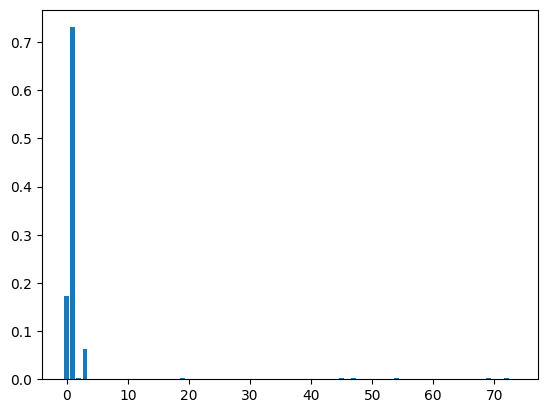

In [ ]:
# Loại bỏ các cột với tree decision Regression

# get importance
importance = tree_regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
# Tìm chỉ số của các feature có mức độ importance dưới 0.00050
low_importance_features = np.where(importance < 0.0560)
# Xóa các feature có mức độ importance dưới 0.00050
X_train_delete_tree_regressor_random = np.delete(X_train, low_importance_features, axis=1)
X_test_delete_tree_regressor_random = np.delete(X_test, low_importance_features, axis=1)
print(low_importance_features[0].shape[0])
print(X_train_delete_tree_regressor_random)

71
[[-2.055 30.845 28.   ]
 [-1.696 28.304 42.   ]
 [-2.836 30.364 47.   ]
 ...
 [-1.959 30.341  1.   ]
 [-1.981 31.219  1.   ]
 [-2.783 28.817  4.   ]]


In [ ]:
regressor_tree_test_after_delete = DecisionTreeRegressor()
regressor_tree_test_after_delete.fit(X_train_delete_tree_regressor_random,Y_train)

DecisionTreeRegressor()

In [ ]:
regressor_tree_test_after_delete.score(X_test_delete_tree_regressor_random,Y_test)

0.9716216122980265

###Model xgboost


In [ ]:
# xgboost for feature importance on a regression problem
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
# define dataset
# define the model
model = XGBRegressor()
# fit the model
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#Score XGBRegressor


In [ ]:
model.score(X_test,Y_test)


0.9703085577383059

Feature: 0, Score: 0.33952
Feature: 1, Score: 0.19639
Feature: 2, Score: 0.00698
Feature: 3, Score: 0.12720
Feature: 4, Score: 0.00082
Feature: 5, Score: 0.00214
Feature: 6, Score: 0.00242
Feature: 7, Score: 0.00168
Feature: 8, Score: 0.00218
Feature: 9, Score: 0.00146
Feature: 10, Score: 0.00347
Feature: 11, Score: 0.00495
Feature: 12, Score: 0.00369
Feature: 13, Score: 0.00350
Feature: 14, Score: 0.00615
Feature: 15, Score: 0.01132
Feature: 16, Score: 0.00364
Feature: 17, Score: 0.00258
Feature: 18, Score: 0.00293
Feature: 19, Score: 0.00776
Feature: 20, Score: 0.00291
Feature: 21, Score: 0.01036
Feature: 22, Score: 0.00048
Feature: 23, Score: 0.00342
Feature: 24, Score: 0.00324
Feature: 25, Score: 0.00838
Feature: 26, Score: 0.00166
Feature: 27, Score: 0.00230
Feature: 28, Score: 0.00168
Feature: 29, Score: 0.00301
Feature: 30, Score: 0.00131
Feature: 31, Score: 0.00217
Feature: 32, Score: 0.00346
Feature: 33, Score: 0.00117
Feature: 34, Score: 0.00732
Feature: 35, Score: 0.00149
Fe

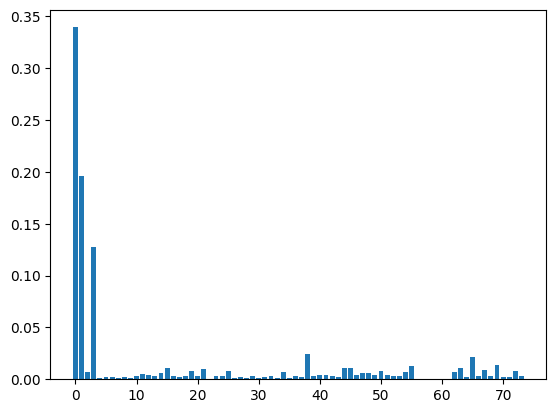

In [ ]:

# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
# Tìm chỉ số của các feature có mức độ importance dưới 0.00050
low_importance_features = np.where(importance <= 0.13)
print(low_importance_features[0].shape[0])
# Xóa các feature có mức độ importance dưới 0.00050
X_train_delete_xgboost = np.delete(X_train, low_importance_features, axis=1)
X_test_delete_xgboost = np.delete(X_test, low_importance_features, axis=1)


72


In [ ]:
# Train model sau khi xoá
xgboostModel = XGBRegressor()
xgboostModel.fit(X_train_delete_xgboost,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#Score sau khi lấy importance XGBRegressor

In [ ]:
xgboostModel.score(X_test_delete_xgboost,Y_test)

0.8994728404693346

Feature: 0, Score: 0.16568
Feature: 1, Score: 0.73605
Feature: 2, Score: 0.00153
Feature: 3, Score: 0.05695
Feature: 4, Score: 0.00032
Feature: 5, Score: 0.00055
Feature: 6, Score: 0.00029
Feature: 7, Score: 0.00028
Feature: 8, Score: 0.00031
Feature: 9, Score: 0.00039
Feature: 10, Score: 0.00032
Feature: 11, Score: 0.00015
Feature: 12, Score: 0.00042
Feature: 13, Score: 0.00123
Feature: 14, Score: 0.00064
Feature: 15, Score: 0.00120
Feature: 16, Score: 0.00049
Feature: 17, Score: 0.00093
Feature: 18, Score: 0.00048
Feature: 19, Score: 0.00133
Feature: 20, Score: 0.00041
Feature: 21, Score: 0.00024
Feature: 22, Score: 0.00027
Feature: 23, Score: 0.00032
Feature: 24, Score: 0.00018
Feature: 25, Score: 0.00047
Feature: 26, Score: 0.00032
Feature: 27, Score: 0.00026
Feature: 28, Score: 0.00036
Feature: 29, Score: 0.00036
Feature: 30, Score: 0.00017
Feature: 31, Score: 0.00030
Feature: 32, Score: 0.00017
Feature: 33, Score: 0.00027
Feature: 34, Score: 0.00052
Feature: 35, Score: 0.00034
Fe

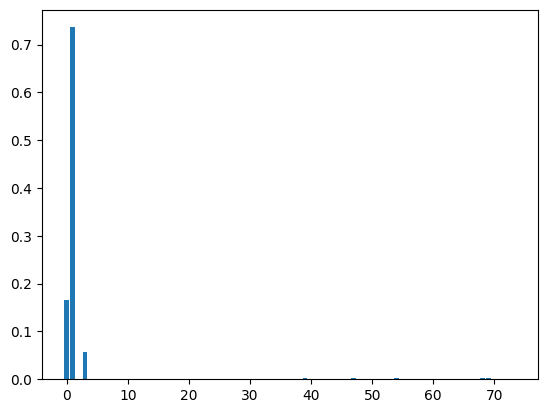

In [ ]:
# Loại bỏ các cột với Random Forest Regression

# get importance
importance = regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
# Tìm chỉ số của các feature có mức độ importance dưới 0.00050
low_importance_features = np.where(importance < 0.057)

# Xóa các feature có mức độ importance dưới 0.00050
X_train_delete_regressor_random = np.delete(X_train, low_importance_features, axis=1)
X_test_delete_regressor_random = np.delete(X_test, low_importance_features, axis=1)
print(low_importance_features[0].shape[0])
print(X_train_delete_regressor_random)

72
[[-2.055 30.845]
 [-1.696 28.304]
 [-2.836 30.364]
 ...
 [-1.959 30.341]
 [-1.981 31.219]
 [-2.783 28.817]]


In [ ]:
# Tìm lại model mới
regressor_test_after_delete = RandomForestRegressor(n_estimators = 10)
regressor_test_after_delete.fit(X_train_delete_regressor_random,Y_train)

<ipython-input-285-17baef40254a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor_test_after_delete.fit(X_train_delete_regressor_random,Y_train)


RandomForestRegressor(n_estimators=10)

In [ ]:
regressor_test_after_delete.score(X_test_delete_regressor_random,Y_test)

0.9002105315228623

##Test

In [ ]:
#Regression Random forest
df_test = pd.read_csv('test.csv')
new_df_test = df_test.fillna(-1, inplace=False)
x_df_test = new_df_test.iloc[:, 1:].values
id_x_test = new_df_test.iloc[:,0]
# split into train and test sets
x_df_test = np.delete(x_df_test, low_importance_features, axis=1)
y_test_predict = regressor_test_after_delete.predict(x_df_test)
df_result = pd.DataFrame({
    'ID_LAT_LON_YEAR_WEEK': id_x_test,
    'emission': y_test_predict
})
df_result.to_csv('output.csv', index=False)

In [ ]:
df_test = pd.read_csv('test.csv')
new_df_test = df_test.fillna(-1, inplace=False)
x_df_test = new_df_test.iloc[:, 1:].values
id_x_test = new_df_test.iloc[:,0]
# split into train and test sets
x_df_test = np.delete(x_df_test, low_importance_features, axis=1)
y_test_predict = xgboostModel.predict(x_df_test)
df_result = pd.DataFrame({
    'ID_LAT_LON_YEAR_WEEK': id_x_test,
    'emission': y_test_predict
})
df_result.to_csv('output.csv', index=False)